<a href="https://colab.research.google.com/github/sikha2552/Biomedical_Image_Analysis_-Datacamp-/blob/main/Chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 2**
## Intensity


Read a X Ray image of hand.

X-ray absorption is highest in dense tissue such as bone, so the resulting intensities should be high. Consequently, images like this can be used to predict "bone age" in children.

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
im=imageio.imread('/content/drive/MyDrive/MY_Learnings/DATACAMP-Courses/Biomedical_image_analysis/Chapter 2/hand.png')

<ipython-input-1-90fd848c4c17>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im=imageio.imread('/content/drive/MyDrive/MY_Learnings/DATACAMP-Courses/Biomedical_image_analysis/Chapter 2/hand.png')


In [2]:
#Print the datatype
print("Datatype of the image is: {}".format(im.dtype))
print("The minimum intensity value is :{}".format(np.min(im)))
print("The maximum intensity value is :{}".format(np.max(im)))

Datatype of the image is: uint8
The minimum intensity value is :3
The maximum intensity value is :224


In [3]:
def format_and_render_plot():
  fig = plt.gcf() #Get the current figure
  for a in fig.axes:
    a.axis('off')
  plt.tight_layout()
  plt.show()

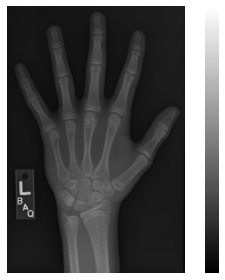

In [4]:
# Plot the grayscale image
plt.imshow(im,vmin=0,vmax=255,cmap='gray')
plt.colorbar()
format_and_render_plot()

### Histograms

Histograms display the distribution of values in your image by binning each element by its intensity then measuring the size of each bin.

The **area under a histogram** is called the **cumulative distribution function**. It measures the frequency with which a given range of pixel intensities occurs.

In [5]:
import scipy.ndimage as ndi
hist=ndi.histogram(im,min=0,max=255,bins=256)
hist.shape


(256,)

In [6]:
#Calculate the cumulative distributive function of the histogram
cdf=hist.cumsum()/hist.sum()

In [7]:
def formathist():
    '''Custom function to simplify common formatting operations for exercises. Operations include: 
    1. Turning off axis grids.
    2. Calling `plt.tight_layout` to improve subplot spacing.
    3. Calling `plt.show()` to render plot.'''
    fig = plt.gcf()
    for ax in fig.axes:
        ax.legend(loc='center right')
    plt.show()

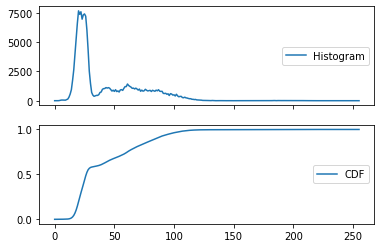

In [8]:
# Plot the histogram and CDF
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist, label='Histogram')
axes[1].plot(cdf, label='CDF')
#format_and_render_plot()
formathist()

In [9]:
cdf.shape

(256,)

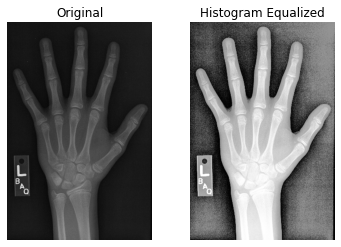

In [13]:
#equalize histogram using CDF
im_equaliz=cdf[im]*255
fig,ax=plt.subplots(nrows=1,ncols=2)
ax[0].imshow(im,cmap='gray') 
ax[0].set_title("Original")
ax[1].imshow(im_equaliz,cmap='gray')
ax[1].set_title("Histogram Equalized")
for a in ax:
  a.axis('off')

https://goodboychan.github.io/python/datacamp/vision/2020/08/15/01-Masks-and-Filters-in-Biomedical-Image-Analysis.html